In [1]:
import os
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize

## Loading the data from directory, subdirectory and files

In [5]:
X = list()
Y = list()
for r,d,f in os.walk(r'''20_newsgroups'''):
    for file in f:
        X.append(os.path.join(r,file))
print(len(X))


for r,d,f in os.walk(r'''20_newsgroups'''):
    for dirc in d:
        Y.append(os.path.join(r,dirc))
print(len(Y))

19998
20


## Test Train Split

In [6]:
test_file = list()
train_file = X
for i in range(0,len(train_file),50):
    test_file.append(train_file[i])
for j in test_file:
    train_file.remove(j)

In [7]:
print(len(test_file))
len(train_file)

400


19598

## Creating a list of complete stop words

In [8]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [9]:
len(stopwords)

179

In [10]:
stopwords_i = [word.title() for word in stopwords]
stopwords_u = [word.upper() for word in stopwords]
others = [str(i) for i in range(101)] + [str(i)+"." for i in range(101)]
sp = ["''",'""',"'",'"','!','~','`','!','@','#','$','%','^','&','*','/','-','+','_',':)','**','***','_/',
      '----------------------------------------------------------------------',
      '[]','{}','()','\\','|','[',']','(','|>','>>','<<',
')','{','}',',','.','?','=','<=','>=','<','>',':',';','A','B','Q','W','E','R','T','Y','U','I','O','P','S','D','F',
      'G','H','J','K','L','Z','X','C','V','N','M','A.','B.','Q.','W.','E.','R.','T.','Y.','U.','I.','O.','P.',
      'S.','D.','F.','G.','H.','J.','K.','L.','Z.','X.','C.','V.','N.','M.']
stopwords = stopwords + stopwords_i + stopwords_u + others + sp
len(stopwords)

839

## Building the Vocabulary

In [23]:
from nltk.tokenize import TweetTokenizer

In [62]:
tknz = TweetTokenizer()

In [77]:
vocab = {}
for k in train_file:
    #with open(k, 'rb') as f:
    #    text = f.read()
        text = tknz.tokenize(open(k,errors = "replace").read())
    #with open(k, encoding="utf8", errors='ignore') as f:
        #text = f.read()
        for t in text:
            if t not in stopwords:
                if vocab.get(t) != None:
                    vocab[t] += 1
                else:
                    vocab[t] = 1
    

In [78]:
print(len(vocab.keys()))

281630


In [79]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

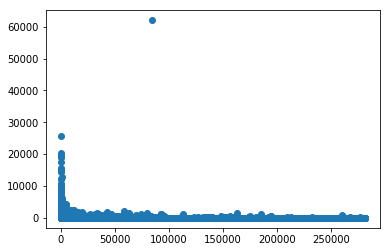

In [80]:
x_axis = list(range(len(vocaba.keys())))
y_axis = list(vocab.values()) 
plt.scatter(x_axis,y_axis)
#plt.axis([0,350000,0,50000])
plt.show

## sorting the vocab list in descending order on the basis of values

In [85]:
voc = vocab
voc = sorted(voc.items(), key=lambda x: x[1], reverse=True) #Sorting the words according to their frequencies in the dataset
col = voc[0:2000] #Choosing top 2000 most occuring words
col = dict(col) 
columns = list(col.keys()) #list of all 2000 words

## creating a np array with total no. of training files as rows and total no. of vocab selected as columns

In [119]:
x_train = np.array([[0] * len(col) for i in range(len(train_file))])

In [120]:
x_train.shape

(19598, 2000)

## Traversing through each file again and checking each word if it is in vocab then incrementing its frequency

In [121]:
for k in range(len(train_file)):
    text = tknz.tokenize(open(train_file[k],errors = 'replace').read())
    for t in text:
        if t in columns:
            pos = columns.index(t)
            x_train[k][pos] += 1

In [122]:
x_train.shape

(19598, 2000)

In [125]:
df_train = pd.DataFrame(x_train,columns = columns)
y_train = list()

20_newsgroups/talk.politics.mideast/75895


In [126]:
for i in train_file:
    clas = i.split('/')[1]
    y_train.append(clas)

In [128]:
y_train = np.array(y_train)

In [130]:
y_train.shape

(19598,)

## Creating array for x_test and y_test as well

In [131]:
x_test = np.array([[0] * len(col) for i in range(len(test_file))])

In [133]:
for k in range(len(test_file)):
    text = tknz.tokenize(open(test_file[k],errors = 'replace').read())
    for t in text:
        if t in columns:
            pos = columns.index(t)
            x_test[k][pos] += 1

In [135]:
x_test.shape

(400, 2000)

In [137]:
df_test = pd.DataFrame(x_test, columns = columns)
y_test = list()

In [138]:
for i in test_file:
    clas = i.split('/')[1]
    y_test.append(clas)

In [139]:
y_test = np.array(y_test)

In [140]:
y_test.shape

(400,)